In [1]:
import tensorflow as tf
import keras
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow.keras.backend as K

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


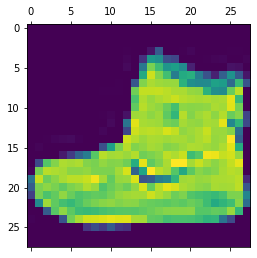

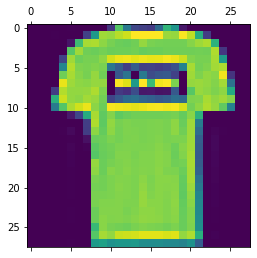

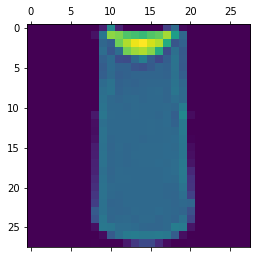

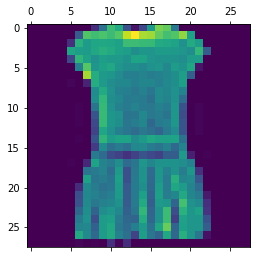

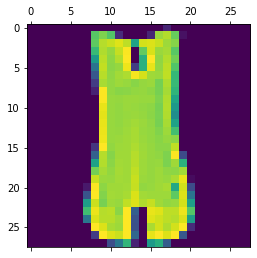

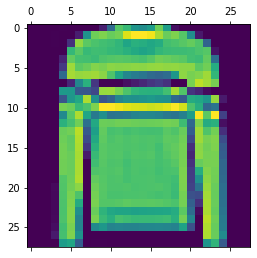

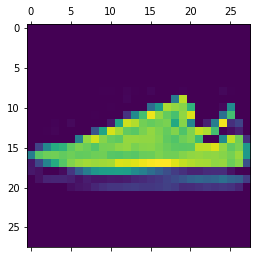

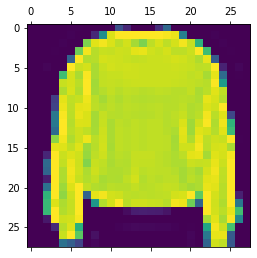

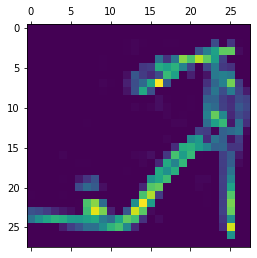

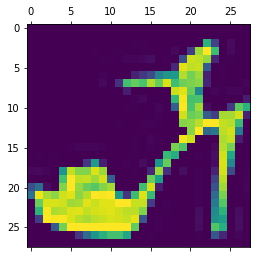

In [3]:
for i in range(0,10):
    plt.matshow(X_train[i])


In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
labels_set=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
n=int(input("Enter the value of n:"))
print("Value of n:",n)

Enter the value of n:12
Value of n: 12


In [8]:
X_train=X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test=X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train_old=X_train.reshape(60000,28,28)
X_test_old=X_test.reshape(10000,28,28)


In [9]:
X_train=X_train/255.0
X_test=X_test/255.0
num_classes=10

In [10]:
#y_train=tf.keras.utils.to_categorical(y_train, 10)
#y_test=tf.keras.utils.to_categorical(y_test, 10)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input

In [12]:
model=Sequential()

In [13]:
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(10, activation='softmax'))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         36992     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [15]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [16]:
model.fit(X_train,y_train,
          epochs=10,
          validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.8015 - accuracy: 0.6935 - val_loss: 0.5676 - val_accuracy: 0.7926
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.5060 - accuracy: 0.8169 - val_loss: 0.4622 - val_accuracy: 0.8361
Epoch 3/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.4236 - accuracy: 0.8467 - val_loss: 0.4055 - val_accuracy: 0.8549
Epoch 4/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.3779 - accuracy: 0.8641 - val_loss: 0.4127 - val_accuracy: 0.8509
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3414 - accuracy: 0.8754 - val_loss: 0.3619 - val_accuracy: 0.8696
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.3182 - accuracy: 0.8835 - val_loss: 0.3688 - val_accuracy: 0.8670
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.3002 - accuracy: 0.8894 - val_loss: 0.3422 -

In [17]:
y_pred=model.predict(X_test)

Enter the value of n:3
Enter the number of the cloth: 3


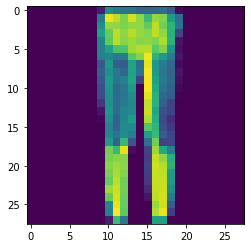

Prediction: Trouser
Correct!!!!
Enter the value of n:10
Enter the number of the cloth: 10


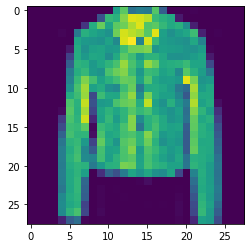

Prediction: Coat
Correct!!!!


In [ ]:
for i in range(0,10):
    n=int(input("Enter the value of n:"))
    print("Enter the number of the cloth:",n)
    plt.imshow(X_test_old[n])
    plt.show()
    print("Prediction:",labels_set[np.argmax(y_pred[n])])
    print("Correct!!!!")
  

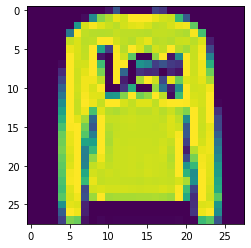

In [19]:
plt.imshow(X_test_old[1])
plt.show()

In [20]:
y_pred[1]

array([2.1023028e-02, 2.2117254e-06, 9.5752066e-01, 3.1120921e-04,
       7.8463386e-04, 1.5374768e-08, 2.0257749e-02, 6.1230652e-11,
       1.0039822e-04, 4.7702815e-09], dtype=float32)

In [21]:
print("Prediction:",labels_set[np.argmax(y_pred[1])])


Prediction: Pullover


In [22]:
accuracy=model.evaluate(X_test,y_test,verbose=7)
print("Accuracy",accuracy)

Accuracy [0.31965070962905884, 0.8871999979019165]
